## 0. Open one plot to see interaction sites USE1

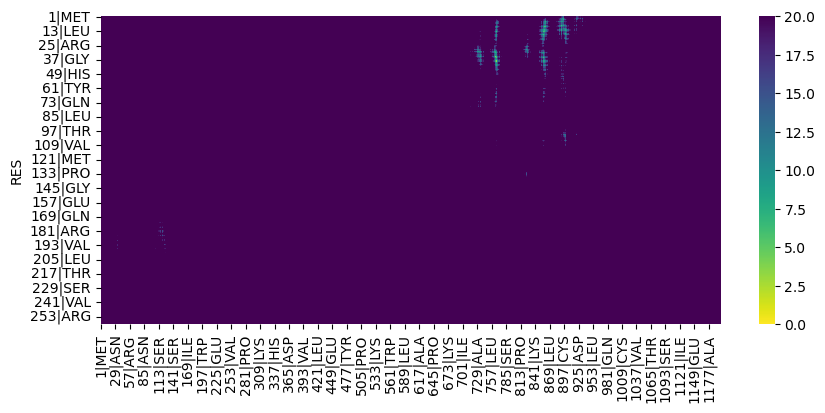

In [5]:
import pandas as pd

# Define the path to your file
file_path = "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv"

# Load the data into a DataFrame
df = pd.read_csv(file_path, delimiter='\t', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df, cmap='viridis_r', vmin=0, vmax=20)

# Show the plot
plt.show()


## 1. Generate one plot with mean values from all five predicted models

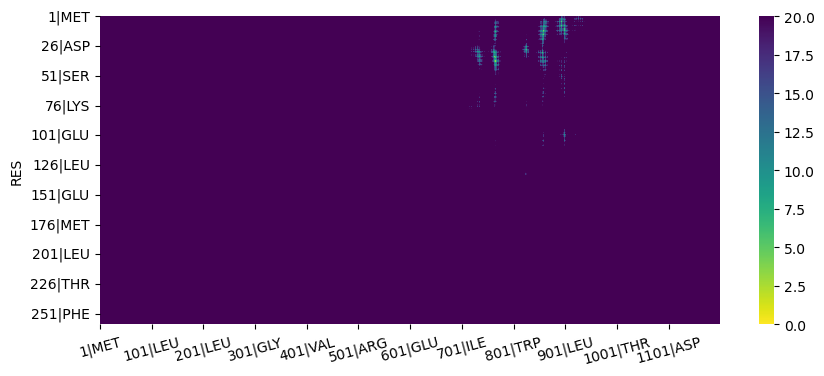

In [8]:
# Define the paths to your files
file_paths = [
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=20)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

## 2. Zoom in to direct contact site

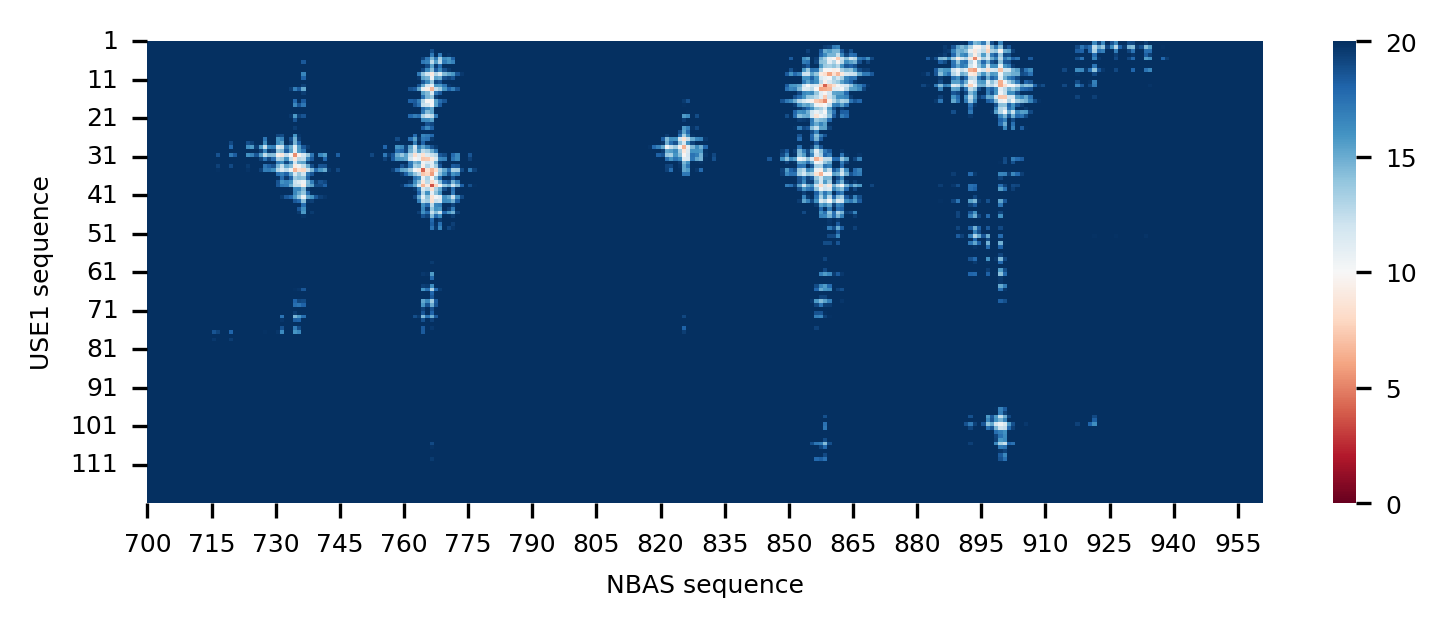

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "C:\\Users\\jlr10\\OneDrive - North-Eastern Federal University in Yakutsk\\A-IM-G(20)\\Кандидатская диссертация\\Статья генотип-белок\\Методы\\AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define the colors for the colormap
colors = ['white', '#ffffbf', '#3a528b', '#440154']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom viridis', colors)

# Define the range of rows and columns you want to plot
row_range = slice(0, 120)  # This will select rows 200 to 300
col_range = slice(699, 960)  # This will select columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=20)

x_axis_set = 15
y_axis_set = 10
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), df_zoom.columns[::x_axis_set], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('USE1 sequence', rotation=90, fontsize=font_size)
plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# now ZW10

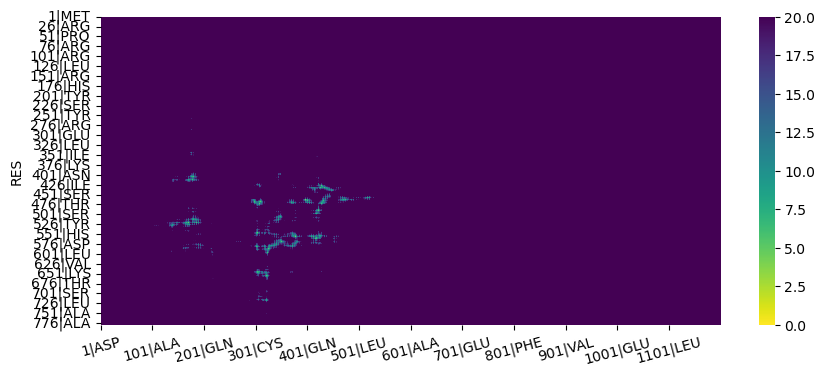

In [15]:
# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=20)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

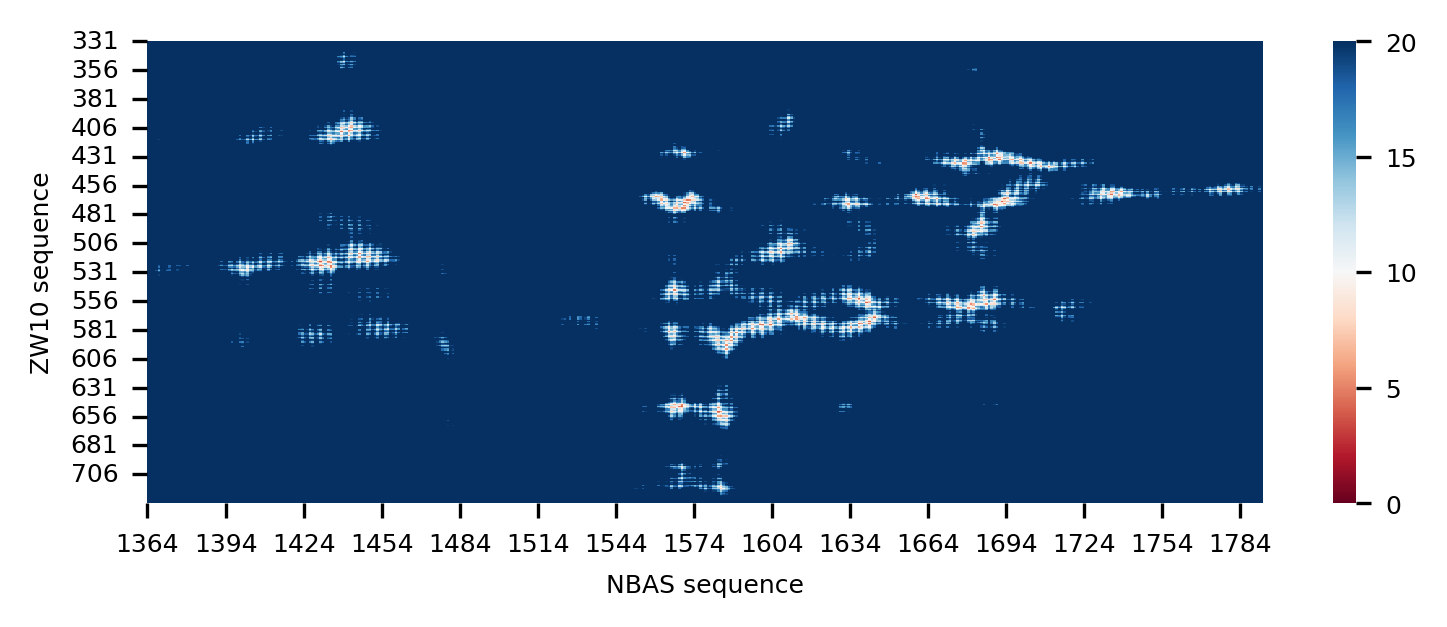

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define the colors for the colormap
colors = ['white', '#ffffbf', '#3a528b', '#440154']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom viridis', colors)

# Define the range of rows and columns you want to plot
row_range = slice(330, 730)  # This will select Y axis rows 200 to 300
col_range = slice(101, 530)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=20)

x_axis_set = 30
y_axis_set = 25
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1262 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('ZW10 sequence', rotation=90, fontsize=font_size)
plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# RINT1 ZW10

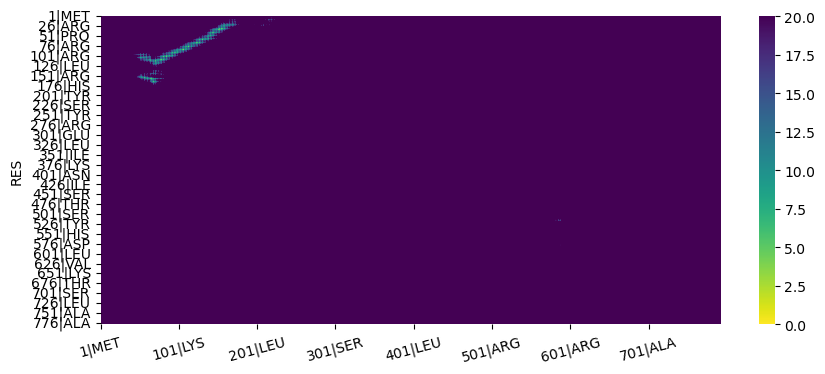

In [6]:
# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=20)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

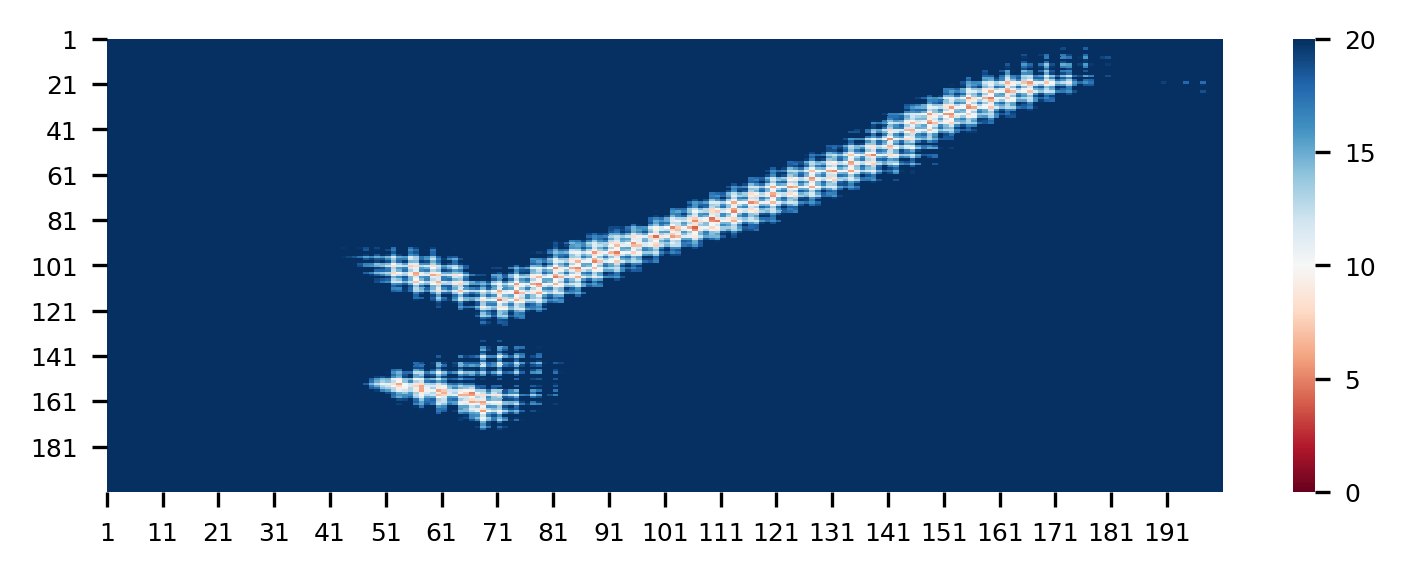

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-RINT1\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define the colors for the colormap
colors = ['white', '#ffffbf', '#3a528b', '#440154']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom viridis', colors)

# Define the range of rows and columns you want to plot
row_range = slice(0, 200)  # This will select Y axis rows 200 to 300
col_range = slice(0, 200)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=20, cbar=True)

x_axis_set = 10
y_axis_set = 20
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

# Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()


# RINT1 BNIP1

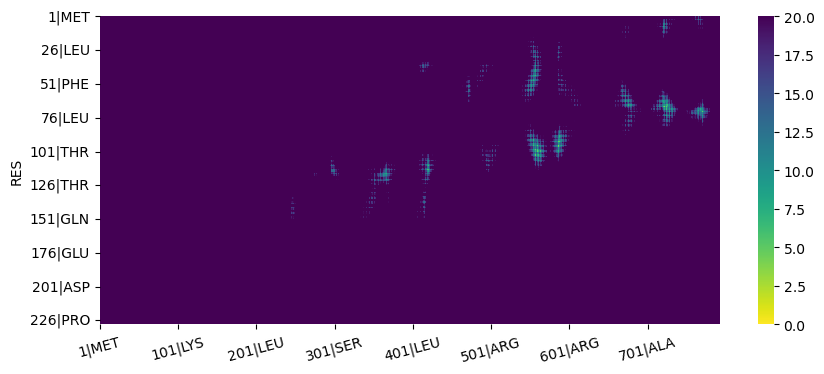

In [7]:
# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_mean, cmap='viridis_r', vmin=0, vmax=20)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_mean.shape[1], 100), df_mean.columns[::100], rotation=15)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_mean.shape[0], 25), df_mean.index[::25])

# Show the plot
plt.show()

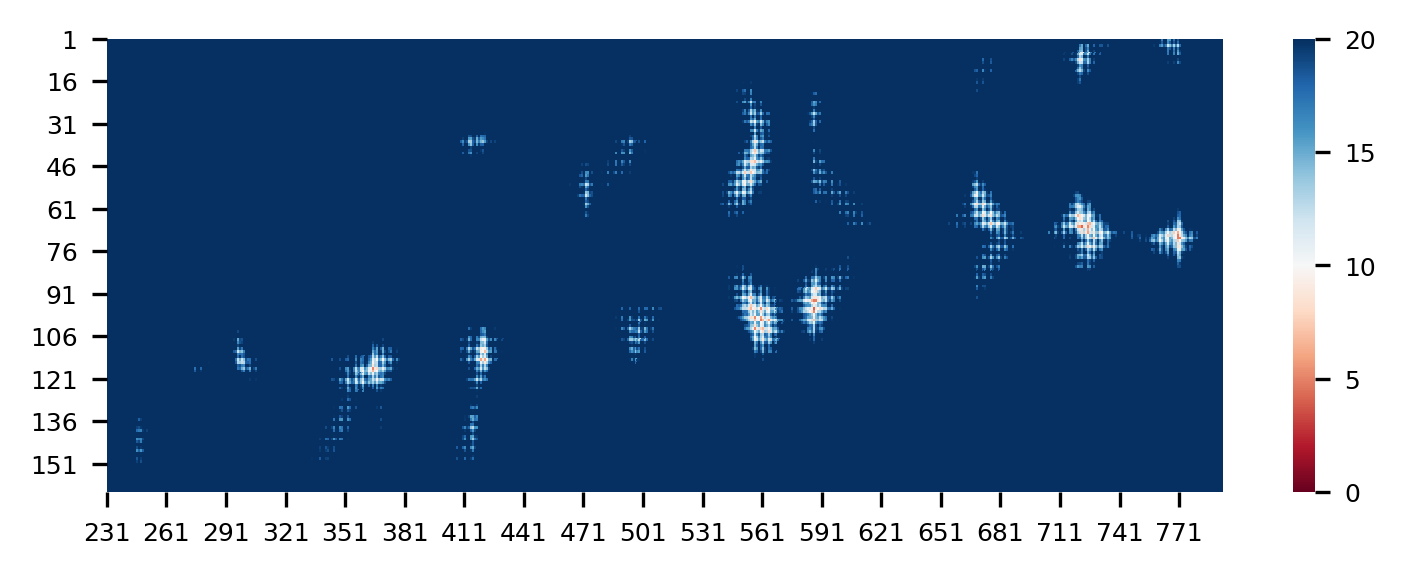

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\RINT1-BNIP1\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define the colors for the colormap
colors = ['white', '#ffffbf', '#3a528b', '#440154']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('custom viridis', colors)

# Define the range of rows and columns you want to plot
row_range = slice(0, 160)  # This will select Y axis rows 200 to 300
col_range = slice(230, 792)  # This will select X axis columns 1180 to 1280

# Select the subset of data
df_zoom = df_mean.iloc[row_range, col_range]

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]

# Now, you can plot your heatmap as before
plt.figure(figsize=(6, 2), dpi=300)
ax = sns.heatmap(df_zoom, cmap="RdBu", vmin=0, vmax=20, cbar=True)

x_axis_set = 30
y_axis_set = 15
font_size = 6

# Get the colorbar
cbar = ax.collections[0].colorbar

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)
# plt.gca().set_xlabel('NBAS sequence', fontsize=font_size)

plt.show()

# RAB18

## ZW10 NBAS RINT1 RAB18 solely

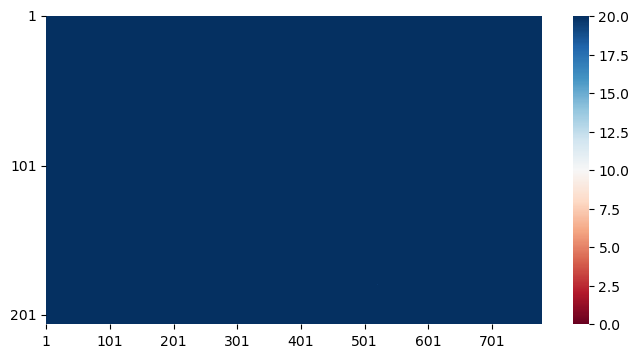

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\ZW10-Rab18\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10-Rab18\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10-Rab18\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10-Rab18\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10-Rab18\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean
# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 100
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

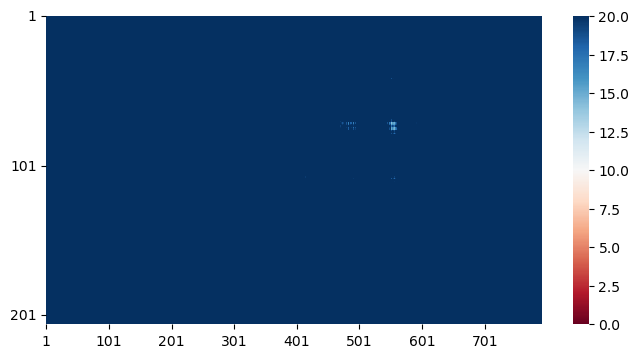

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\RINT1-Rab18\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\RINT1-Rab18\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\RINT1-Rab18\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\RINT1-Rab18\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\RINT1-Rab18\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 100
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_xlabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

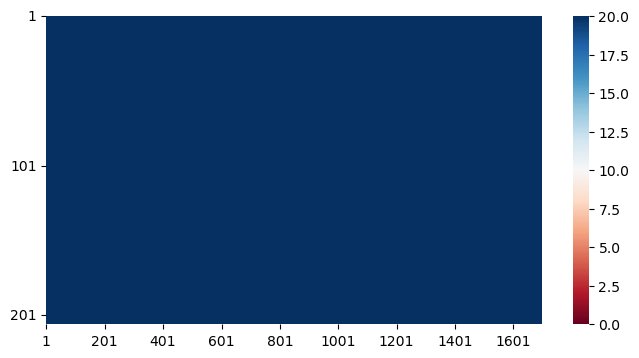

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\Rab18_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\Rab18_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\Rab18_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\Rab18_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\Rab18_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(8, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 200
y_axis_set = 100
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

### contact site

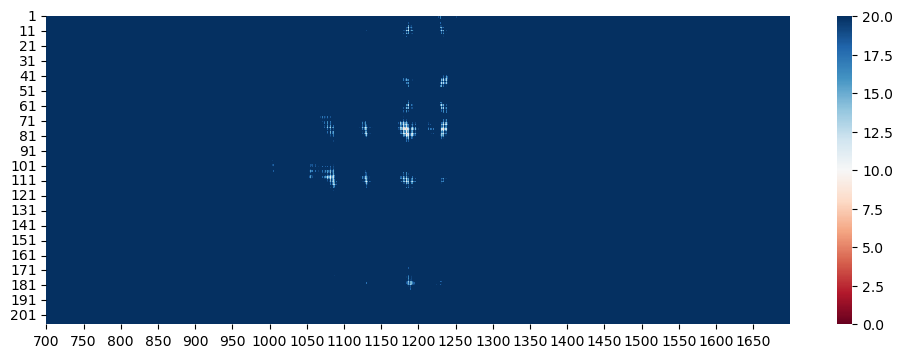

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_3.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 10
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+699 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

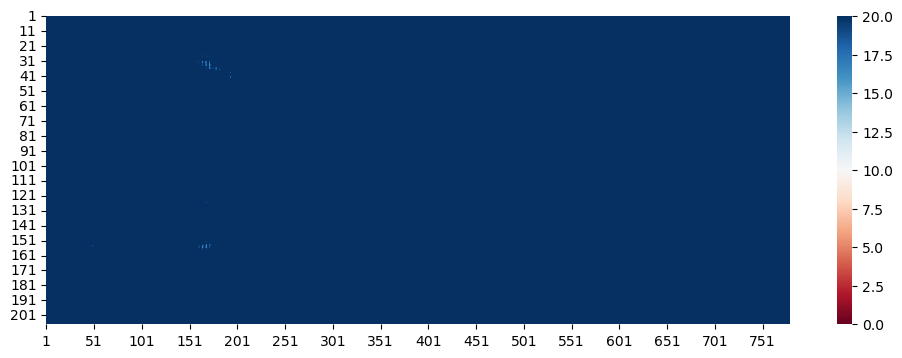

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 10
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

# UPF3B

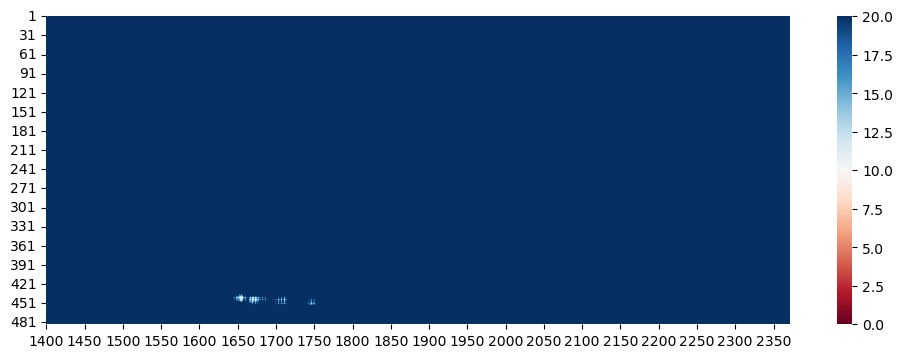

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 30
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

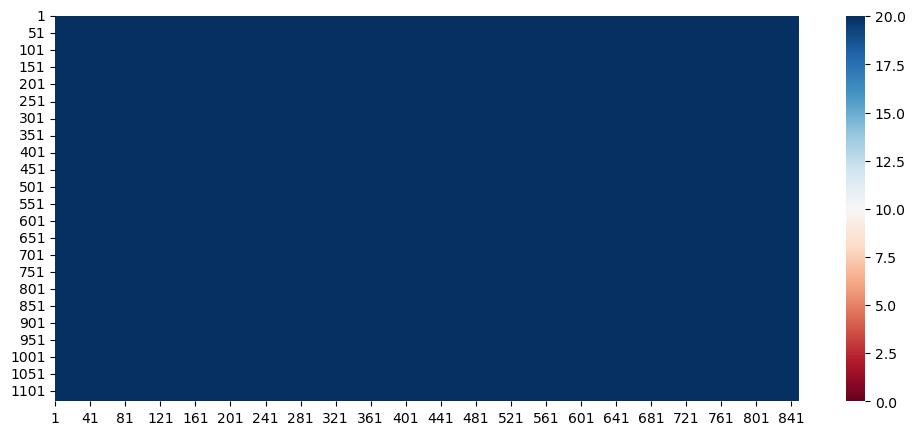

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\UPF1-NtermNBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-NtermNBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-NtermNBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-NtermNBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-NtermNBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+0 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

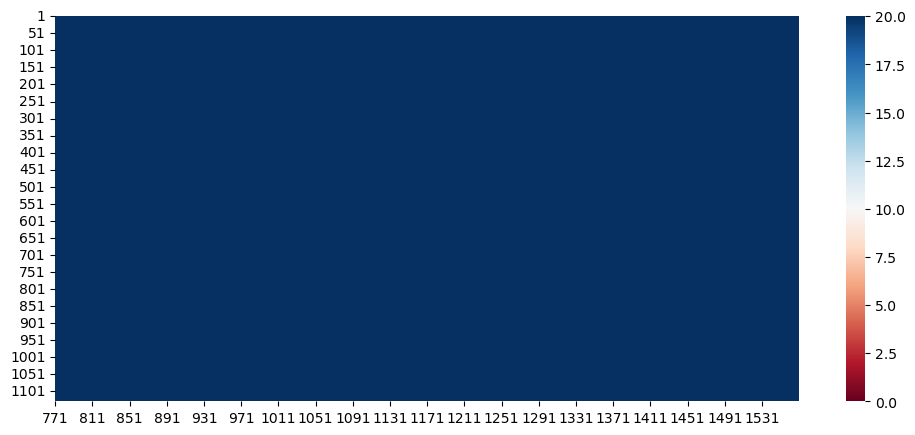

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\UPF1-Sec39NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-Sec39NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-Sec39NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-Sec39NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-Sec39NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+770 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

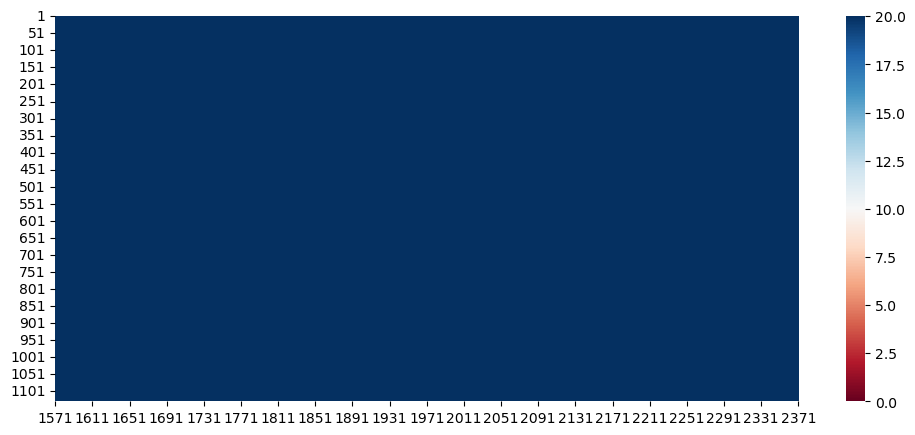

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\UPF1-CtermNBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-CtermNBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-CtermNBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-CtermNBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF1-CtermNBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbar
cbar = ax.collections[0].colorbar

x_axis_set = 40
y_axis_set = 50
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1570 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

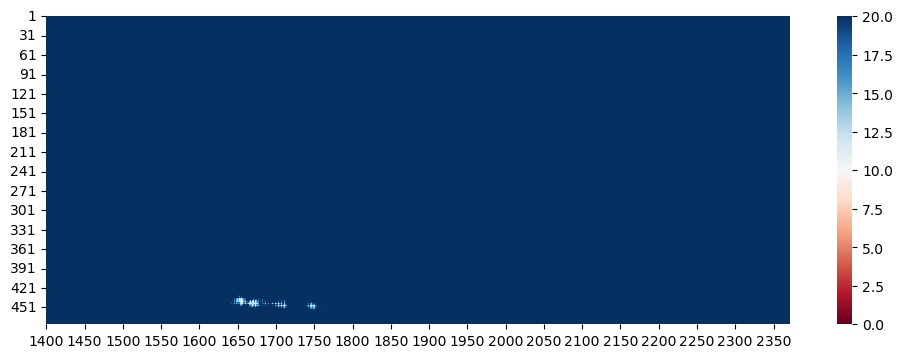

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\upf3a-nbas\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\upf3a-nbas\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\upf3a-nbas\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\upf3a-nbas\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\upf3a-nbas\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Transpose the DataFrame
# df_zoom = df_zoom.transpose() 

# Extract the numbers from the index and columns
df_zoom.index = df_zoom.index.str.split('|').str[0]
df_zoom.columns = df_zoom.columns.str.split('|').str[0]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(12, 4))
ax = sns.heatmap(df_zoom, cmap='RdBu', vmin=0, vmax=20)

# Get the colorbarя
cbar = ax.collections[0].colorbar

x_axis_set = 50
y_axis_set = 30
font_size = 10

#Set the font size of the colorbar ticks
for t in cbar.ax.yaxis.get_ticklabels():
    t.set_fontsize(font_size)

# Set the ticks on the x-axis to be every 50
plt.xticks(range(0, df_zoom.shape[1], x_axis_set), [int(i)+1399 for i in df_zoom.columns[::x_axis_set]], rotation=0, fontsize=font_size)

# Set the ticks on the y-axis to be every 50
plt.yticks(range(0, df_zoom.shape[0], y_axis_set), df_zoom.index[::y_axis_set], fontsize=font_size)

plt.gca().set_ylabel('', rotation=90, fontsize=font_size)

# Show the plot
plt.show()

# contact aa USE1

In [6]:
import pandas as pd

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define a threshold distance
threshold_distance = 10

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Print out the amino acid sequences
            print("Amino Acids in Close Proximity:")
            print(f"Row Amino Acid: {index}")
            print(f"Column Amino Acid 1: {int(amino_acids[0])}")
            # print(f"Column Amino Acid 2: {amino_acids[1]}")
            print(f"Distance: {distance}")
            print()


Amino Acids in Close Proximity:
Row Amino Acid: 2|ALA
Column Amino Acid 1: 893
Distance: 9.718599999999999

Amino Acids in Close Proximity:
Row Amino Acid: 2|ALA
Column Amino Acid 1: 894
Distance: 9.622

Amino Acids in Close Proximity:
Row Amino Acid: 2|ALA
Column Amino Acid 1: 896
Distance: 8.676400000000001

Amino Acids in Close Proximity:
Row Amino Acid: 3|ALA
Column Amino Acid 1: 893
Distance: 8.879999999999999

Amino Acids in Close Proximity:
Row Amino Acid: 3|ALA
Column Amino Acid 1: 896
Distance: 7.772200000000001

Amino Acids in Close Proximity:
Row Amino Acid: 3|ALA
Column Amino Acid 1: 899
Distance: 9.6326

Amino Acids in Close Proximity:
Row Amino Acid: 4|SER
Column Amino Acid 1: 893
Distance: 9.2622

Amino Acids in Close Proximity:
Row Amino Acid: 5|ARG
Column Amino Acid 1: 860
Distance: 9.8156

Amino Acids in Close Proximity:
Row Amino Acid: 5|ARG
Column Amino Acid 1: 861
Distance: 7.4474

Amino Acids in Close Proximity:
Row Amino Acid: 5|ARG
Column Amino Acid 1: 889
Dista

In [7]:
import pandas as pd

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Define a threshold distance
threshold_distance = 10

# Initialize an empty list to collect amino acids
amino_acids_list = []

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Append the first amino acid to the list
            amino_acids_list.append(amino_acids[0])

# Sort the list of amino acids in increasing order
sorted_amino_acids = sorted(amino_acids_list)

# Print the sorted list
print("Amino Acids Sorted in Increasing Order:")
print(sorted_amino_acids)


Amino Acids Sorted in Increasing Order:
['730', '731', '734', '734', '734', '734', '735', '735', '736', '736', '762', '762', '763', '764', '764', '764', '764', '764', '764', '764', '765', '765', '765', '765', '765', '765', '766', '766', '766', '766', '766', '766', '766', '766', '766', '766', '766', '767', '767', '824', '825', '825', '825', '825', '854', '855', '856', '856', '856', '856', '856', '857', '857', '857', '857', '857', '857', '857', '857', '857', '858', '858', '858', '858', '858', '858', '858', '858', '858', '858', '859', '859', '859', '859', '859', '859', '860', '860', '860', '860', '861', '861', '861', '861', '862', '889', '892', '892', '892', '892', '893', '893', '893', '893', '893', '893', '894', '894', '896', '896', '896', '899', '899', '899', '899', '899', '900', '900', '900', '901']


In [30]:
import pandas as pd

# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\USE1_NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)


# Define a threshold distance
threshold_distance = 13

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids[0]))

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[727, 730, 731, 732, 733, 734, 735, 736, 737, 761, 762, 763, 764, 765, 766, 767, 768, 771, 821, 822, 824, 825, 826, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 921, 926]


## contact aa ZW10

In [29]:
# Define the paths to your files
file_paths = [
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\1_NRZ\\ZW10-NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Define a threshold distance
threshold_distance = 13

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids[0])+1171) # cuz it adds and starts to 0 value in python

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1305, 1307, 1308, 1309, 1310, 1311, 1313, 1315, 1316, 1319, 1320, 1323, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1364, 1365, 1464, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1532, 1533, 1535, 1536, 1537, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1556, 1557, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593

## contact RAB18

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_3.tsv",
    "AFM\\2_NRZ_Rab18\\ZW10_Rab18_Sec39NBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_3.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Select the subset of data
# df_zoom = df_mean.iloc[row_range, col_range]
df_zoom = df_mean

# Define a threshold distance
threshold_distance = 13

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids[0])+699)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1077, 1078, 1081, 1082, 1085, 1128, 1130, 1176, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1190, 1192, 1231, 1232, 1233, 1234, 1236, 1237]


## contact UPF3B

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np

# Define the paths to your files
file_paths = [
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_0-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_1-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_2-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_3-query_1-query_2.tsv",
    "AFM\\4_NBAS_NMD\\UPF3B-CtermNBAS\\interchain_contact\\interchain_contact-rank_4-query_1-query_2.tsv",
]

# Load the data from each file into a DataFrame
dfs = [pd.read_csv(file_path, delimiter='\t', index_col=0) for file_path in file_paths]

# Load the first file into a DataFrame
df = pd.read_csv(file_paths[0], delimiter='\t', index_col=0)

# Extract the labels from the index
labels = df.index.values

# Concatenate all DataFrames along a new axis and calculate the mean
df_mean = pd.concat(dfs, axis=0).groupby(level=0).mean()

# Sort the index of the DataFrame
df_mean = df_mean.sort_index()

# Sort the DataFrame according to the extracted labels
df_mean = df_mean.reindex(labels)

# Define a threshold distance
threshold_distance = 13

# Initialize an empty set to collect unique amino acids
unique_amino_acids = set()

# Iterate over the rows of the DataFrame
for index, row in df_mean.iterrows():
    # Iterate over the distances in the row
    for column, distance in row.items():
        # Check if the distance is closer than the threshold
        if distance < threshold_distance:
            # Split the column name to extract the amino acid sequences
            amino_acids = column.split('|')
            # Add the first amino acid to the set
            unique_amino_acids.add(int(amino_acids[0])+1399)

# Convert the set to a sorted list
sorted_unique_amino_acids = sorted(unique_amino_acids)

# Print the sorted list of unique amino acids
print("Unique Amino Acids Sorted in Increasing Order:")
print(sorted_unique_amino_acids)


Unique Amino Acids Sorted in Increasing Order:
[1652, 1653, 1654, 1655, 1656, 1666, 1669, 1670, 1672, 1673, 1674, 1676, 1703, 1706, 1707, 1710, 1711, 1746]


In [33]:
USE1_cs = [727, 730, 731, 732, 733, 734, 735, 736, 737, 761, 762, 763, 764, 765, 766, 767, 768, 771, 821, 822, 824, 825, 826, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 921, 926]
ZW10_cs = [1305, 1307, 1308, 1309, 1310, 1311, 1313, 1315, 1316, 1319, 1320, 1323, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1364, 1365, 1464, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1532, 1533, 1535, 1536, 1537, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1556, 1557, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1624, 1625, 1629, 1635, 1636, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1657, 1661, 1681, 1684, 1685, 1686, 1687, 1688, 1689, 1691, 1692]
RAB18_cs = [1077, 1078, 1081, 1082, 1085, 1128, 1130, 1176, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1190, 1192, 1231, 1232, 1233, 1234, 1236, 1237]
UPF3B_cs = [1652, 1653, 1654, 1655, 1656, 1666, 1669, 1670, 1672, 1673, 1674, 1676, 1703, 1706, 1707, 1710, 1711, 1746]

def categorize_bfactor(bfactor):
    if bfactor > 90:
        return 1
    elif 70 <= bfactor <= 90:
        return 2
    elif 50 <= bfactor < 70:
        return 3
    else:
        return 4

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_data = {}

with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM'):
            atom_name = line[12:16].strip()
            residue_number = int(line[22:26].strip())
            bfactor = float(line[60:66].strip())
            if residue_number not in bfactor_data:
                bfactor_data[residue_number] = []
            bfactor_data[residue_number].append(bfactor)

# Define protein lists
protein_lists = {
    "USE1_cs": USE1_cs,
    "ZW10_cs": ZW10_cs,
    "RAB18_cs": RAB18_cs,
    "UPF3B_cs": UPF3B_cs
}

# Initialize counts for different B-factor ranges for each protein
bfactor_counts = {protein: {1: 0, 2: 0, 3: 0, 4: 0} for protein in protein_lists}

# Iterate through each protein list
for protein, residue_numbers in protein_lists.items():
    for residue_number in residue_numbers:
        if residue_number in bfactor_data:
            # Get B-factor values for the current residue
            bfactor_values = bfactor_data[residue_number]
            # Categorize B-factor values and update counts
            for bfactor in bfactor_values:
                category = categorize_bfactor(bfactor)
                bfactor_counts[protein][category] += 1

# Print results
for protein, counts in bfactor_counts.items():
    print(f"Protein: {protein}")
    print("B-Factor Ranges:")
    for category, count in counts.items():
        print(f"Range {category}: {count} amino acids")
    print()




Protein: USE1_cs
B-Factor Ranges:
Range 1: 133 amino acids
Range 2: 284 amino acids
Range 3: 21 amino acids
Range 4: 0 amino acids

Protein: ZW10_cs
B-Factor Ranges:
Range 1: 0 amino acids
Range 2: 1161 amino acids
Range 3: 450 amino acids
Range 4: 96 amino acids

Protein: RAB18_cs
B-Factor Ranges:
Range 1: 0 amino acids
Range 2: 87 amino acids
Range 3: 115 amino acids
Range 4: 0 amino acids

Protein: UPF3B_cs
B-Factor Ranges:
Range 1: 0 amino acids
Range 2: 111 amino acids
Range 3: 39 amino acids
Range 4: 0 amino acids



In [36]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_data = {}

with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM'):
            atom_name = line[12:16].strip()
            residue_number = int(line[22:26].strip())
            bfactor = float(line[60:66].strip())
            if residue_number not in bfactor_data:
                bfactor_data[residue_number] = []
            bfactor_data[residue_number].append(bfactor)

# Define protein lists
protein_lists = {
    "USE1_cs": USE1_cs,
    "ZW10_cs": ZW10_cs,
    "RAB18_cs": RAB18_cs,
    "UPF3B_cs": UPF3B_cs
}

# Initialize counts for different B-factor ranges for each protein
bfactor_counts = {protein: {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0} for protein in protein_lists}

# Iterate through each protein list
for protein, residue_numbers in protein_lists.items():
    total_residues = len(residue_numbers)
    for residue_number in residue_numbers:
        if residue_number in bfactor_data:
            # Get B-factor values for the current residue
            bfactor_values = bfactor_data[residue_number]
            # Categorize B-factor values and update counts
            for bfactor in bfactor_values:
                category = categorize_bfactor(bfactor)
                bfactor_counts[protein][category] += 1

# Print results
for protein, counts in bfactor_counts.items():
    print(f"Protein: {protein}")
    print("B-Factor Ranges:")
    for category, count in counts.items():
        total_in_range = sum(counts.values())
        percentage = (count / total_in_range) * 100 if total_in_range != 0 else 0
        print(f"{category}: {count} amino acids ({percentage:.2f}%)")
    print()


Protein: USE1_cs
B-Factor Ranges:
pLDDT > 90: 133 amino acids (30.37%)
70 < pLDDT ≤ 90: 284 amino acids (64.84%)
50 < pLDDT ≤ 70: 21 amino acids (4.79%)
pLDDT ≤ 50: 0 amino acids (0.00%)

Protein: ZW10_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 1161 amino acids (68.01%)
50 < pLDDT ≤ 70: 450 amino acids (26.36%)
pLDDT ≤ 50: 96 amino acids (5.62%)

Protein: RAB18_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 87 amino acids (43.07%)
50 < pLDDT ≤ 70: 115 amino acids (56.93%)
pLDDT ≤ 50: 0 amino acids (0.00%)

Protein: UPF3B_cs
B-Factor Ranges:
pLDDT > 90: 0 amino acids (0.00%)
70 < pLDDT ≤ 90: 111 amino acids (74.00%)
50 < pLDDT ≤ 70: 39 amino acids (26.00%)
pLDDT ≤ 50: 0 amino acids (0.00%)



In [1]:
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Read PDB file and extract B-factor values
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"
bfactor_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}

with open(pdb_file, 'r') as f:
    for line in f:
        if line.startswith('ATOM'):
            bfactor = float(line[60:66].strip())
            category = categorize_bfactor(bfactor)
            bfactor_counts[category] += 1

# Print results
print("B-Factor Ranges for the Entire Protein:")
for category, count in bfactor_counts.items():
    total_atoms = sum(bfactor_counts.values())
    percentage = (count / total_atoms) * 100 if total_atoms != 0 else 0
    print(f"{category}: {count} atoms ({percentage:.2f}%)")


B-Factor Ranges for the Entire Protein:
pLDDT > 90: 1515 atoms (8.02%)
70 < pLDDT ≤ 90: 12765 atoms (67.61%)
50 < pLDDT ≤ 70: 2556 atoms (13.54%)
pLDDT ≤ 50: 2043 atoms (10.82%)


In [25]:
path_var = """Pro348Ser
Pro348Ser
Val842Phe
Ile1121Met
Glu803Lys
Arg1914His
Arg1914His
Cys1199Tyr
Gln134Arg
Pro937Ala
Ile1121Met
Ser1178Arg
Leu1708Pro
Cys1199Tyr
Arg1914His
Arg1914His
Arg941His
Arg1914His
Arg873Trp
Cys1199Tyr
Arg137Trp
Arg137Trp
Arg137Trp
Cys1199Tyr
Val519Glu
Gln1201Pro
Gln1201Pro
Pro937Ala
Tyr1578dup
Arg1914His
Arg1914His
His940Pro
Trp845Cys
Gln1201Pro
Ser1129Phe
Ser1129Phe
Thr731Pro
Pro777His
Pro777His
His940Pro
Leu271Pro
Arg873Trp
Arg941His
Leu903Arg
Pro650Ser
Gly254Asp
Leu903Arg
Ile187del
Leu903Arg
Leu1055Pro
Ile984Ser
Pro777His
Leu1055Pro
Cys426Trp
Ala95Val
Arg1914His
Arg1914His
Gly270Ala
Arg1914His
Cys1199Tyr
Cys1199Tyr
His227Pro
His227Pro
Arg1914His
Arg1914His
Thr1918Pro
Glu447Lys
Thr2280Thr
Thr2280Thr
Arg1914His
His1053Arg
Arg1914His
Arg1914His
Arg1914His
Ala95Val
Ser414Phe
Ser414Phe
Arg517Cys
Arg517His
Arg517His
Ile984Ser
Leu1055Pro
Arg1914His
Arg1914Gly
Ala1921Pro
Cys1199Tyr
Ala857Val
Cys1199Tyr
Cys1199Tyr
Cys1199Tyr
Asp2287Tyr
Pro454Arg
Thr1918Pro
2346delLeu
Glu804Gly
Ala409Val
Gly877Val
Ile984Ser
Ile984Ser
Cys1199Tyr
Leu202del
Gln2232Glu
Arg1073Cys
Lys1517Glu
Glu2269Lys
Tyr1495His
Ile984Ser
Arg64His
Arg517Cys
Ala103Thr
Ser1129Phe
Arg517Cys
Leu422Pro
Tyr747Asp
Ser343Asn
Gly340Arg
Trp845Cys
Cys256Tyr
Trp845Cys
Ser1129Phe
Gly340Arg
Arg137Trp
Arg137Trp
Leu1055Pro
Pro454Arg
Met1743Val
Pro1474Leu
Glu1521Gln
Thr1097Met
Arg136Gly
Val568Ile
Glu151Lys
Phe1707Ile
Gly292Glu
Leu1549Pro
Arg517Cys
Arg2335Trp
Arg1914His
Arg1914Cys
Ala1921Pro
Phe671Cys
Arg1914His
Met1Leu
Val892Phe
Val253Gly
Trp396Arg
"""

# Извлечение числовых значений из строк и создание списка для хранения уникальных значений
mutation_numbers = sorted(set(int(''.join(filter(str.isdigit, mutation))) for mutation in path_var.split('\n') if mutation))

# Применение движка скрипта для категоризации числовых значений
def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 <pLDDT ≤90"
    elif 50 < bfactor <= 70:
        return "50 <pLDDT ≤70"
    else:
        return "pLDDT ≤ 50"

# Инициализация словаря для подсчета категорий
bfactor_counts = {"pLDDT > 90": 0, "70 <pLDDT ≤90": 0, "50 <pLDDT ≤70": 0, "pLDDT ≤ 50": 0}

# Применение категоризации к числам из списка и подсчет количества в каждой категории
for mutation_number in mutation_numbers:
    category = categorize_bfactor(mutation_number)
    bfactor_counts[category] += 1

# Вывод результатов
print("Категории для уникальных числовых значений из списка:")
for category, count in bfactor_counts.items():
    total_mutations = sum(bfactor_counts.values())
    percentage = (count / total_mutations) * 100 if total_mutations != 0 else 0
    print(f"{category}: {count} ({percentage:.2f}%)")
print(mutation_numbers)
len(mutation_numbers)

Категории для уникальных числовых значений из списка:
pLDDT > 90: 73 (97.33%)
70 <pLDDT ≤90: 0 (0.00%)
50 <pLDDT ≤70: 1 (1.33%)
pLDDT ≤ 50: 1 (1.33%)
[1, 64, 95, 103, 134, 136, 137, 151, 187, 202, 227, 253, 254, 256, 270, 271, 292, 340, 343, 348, 396, 409, 414, 422, 426, 447, 454, 517, 519, 568, 650, 671, 731, 747, 777, 803, 804, 842, 845, 857, 873, 877, 892, 903, 937, 940, 941, 984, 1053, 1055, 1073, 1097, 1121, 1129, 1178, 1199, 1201, 1474, 1495, 1517, 1521, 1549, 1578, 1707, 1708, 1743, 1914, 1918, 1921, 2232, 2269, 2280, 2287, 2335, 2346]


75

In [26]:
def get_bfactor_for_residue(pdb_file, residue_number):
    bfactor = None
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                atom_residue_number = int(line[22:26].strip())
                if atom_residue_number == residue_number:
                    bfactor = float(line[60:66].strip())
                    break
    if bfactor is None:
        print("ошибка 404")
    return bfactor

# Пример использования:
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"  # Укажите путь к вашему файлу PDB
residue_number = 2000  # Номер аминокислоты для извлечения B-factor

bfactor = get_bfactor_for_residue(pdb_file, residue_number)
if bfactor is not None:
    print(f"B-factor для аминокислоты {residue_number}: {bfactor}")


B-factor для аминокислоты 2000: 83.19


In [31]:
def get_bfactor_for_residues(pdb_file, residue_numbers):
    b_factors = []
    for residue_number in residue_numbers:
        with open(pdb_file, 'r') as f:
            for line in f:
                if line.startswith('ATOM'):
                    atom_residue_number = int(line[22:26].strip())
                    if atom_residue_number == residue_number:
                        b_factor = float(line[60:66].strip())
                        b_factors.append(b_factor)
                        break
    return b_factors

def categorize_bfactor(bfactor):
    if bfactor > 90:
        return "pLDDT > 90"
    elif 70 < bfactor <= 90:
        return "70 < pLDDT ≤ 90"
    elif 50 < bfactor <= 70:
        return "50 < pLDDT ≤ 70"
    else:
        return "pLDDT ≤ 50"

# Пример использования:
pdb_file = "AF-A2RRP1-F1-model_v4.pdb"  # Укажите путь к вашему файлу PDB
residue_numbers = [1, 64, 95, 103, 134, 136, 137, 151, 187, 202, 227, 253, 254, 256, 270, 271, 292, 340, 343, 348, 396, 409, 414, 422, 426, 447, 454, 517, 519, 568, 650, 671, 731, 747, 777, 803, 804, 842, 845, 857, 873, 877, 892, 903, 937, 940, 941, 984, 1053, 1055, 1073, 1097, 1121, 1129, 1178, 1199, 1201, 1474, 1495, 1517, 1521, 1549, 1578, 1707, 1708, 1743, 1914, 1918, 1921, 2232, 2269, 2280, 2287, 2335, 2346]

b_factors = get_bfactor_for_residues(pdb_file, residue_numbers)
if b_factors:
    categories_counts = {"pLDDT > 90": 0, "70 < pLDDT ≤ 90": 0, "50 < pLDDT ≤ 70": 0, "pLDDT ≤ 50": 0}
    total_residues = len(residue_numbers)

    for b_factor in b_factors:
        category = categorize_bfactor(b_factor)
        categories_counts[category] += 1

    print("Результаты категоризации B-factor:")
    for category, count in categories_counts.items():
        percentage = (count / total_residues) * 100
        print(f"{category}: {count} аминокислот ({percentage:.2f}%)")
else:
    print("ошибка 404")
len(residue_numbers)

Результаты категоризации B-factor:
pLDDT > 90: 16 аминокислот (21.33%)
70 < pLDDT ≤ 90: 47 аминокислот (62.67%)
50 < pLDDT ≤ 70: 5 аминокислот (6.67%)
pLDDT ≤ 50: 7 аминокислот (9.33%)


75